In [1]:
from statistics import mean
import numpy as np

In [2]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

In [3]:
def best_fit_slope(xs,ys):
    return (mean(xs) * mean(ys) - mean(xs*ys)) / (mean(xs)**2 - mean(xs*xs))

m = best_fit_slope(xs,ys)
m

0.29999999999999893

In [4]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs, ys)

In [5]:
m

0.29999999999999893

In [6]:
b

4.300000000000003

In [7]:
regression_line = [(m*x)+b for x in xs]

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

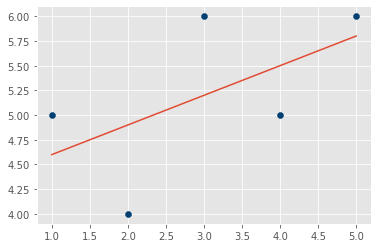

In [9]:
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

In [10]:
predict_x = 7

In [11]:
predict_y = m*predict_x + b
predict_y

6.399999999999996

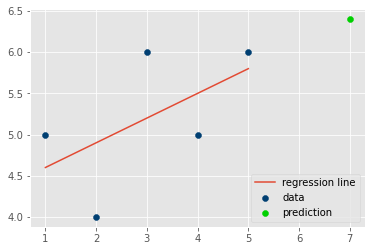

In [15]:
plt.scatter(xs,ys,color='#003F72',label='data')
plt.scatter(predict_x, predict_y, color='#00D000', label='prediction')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

<h1>R Squared and Coefficient of Determination</h1>

In [16]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

In [17]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - squared_error_regr/squared_error_y_mean

In [19]:
r_squared = coefficient_of_determination(ys,regression_line)
r_squared

0.3214285714285714

Low number, so best fit line is not very descriptive of the data. Low amount of numbers equals high variance.

<h1>Creating Sample Data</h1>

In [21]:
import random
def create_dataset(datapoints, variance, step=2, correlation=False):
    val = 1
    ys = []
    
    for i in range(datapoints):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation=='pos':
            val += step
        elif correlation and correlation=='neg':
            val -= step
            
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)  

In [28]:
xs, ys = create_dataset(40,8,2,correlation='neg')

In [29]:
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
r_squared

0.9588853538145803

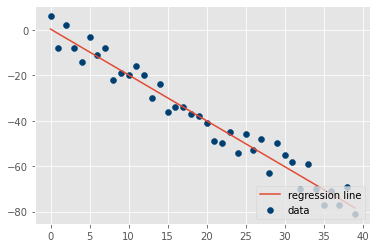

In [30]:
plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()